In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
plt.rcParams['figure.figsize'] = [15, 8]

In [2]:
trend_data_dir = 'data/trends1.csv'
pred_data_dir = 'data/predictions.csv'

In [3]:
trends_df = pd.read_csv(trend_data_dir)
pred_df = pd.read_csv(pred_data_dir)

In [4]:
trends_df.head(3)

Unnamed: 0  top 1  top 2  top 3        date
0           0      4     14     14  2012-10-07
1           1      7     15     18  2012-10-14
2           2      5     12     15  2012-10-21

In [5]:
trends_df.tail(3)

Unnamed: 0  top 1  top 2  top 3        date
258         258     18     66     32  2017-09-17
259         259     19     62     31  2017-09-24
260         260     20     78     27  2017-10-01

In [6]:
## trend data 
print("Trend data -> ", trends_df.shape)
print("Prediction data -> ", pred_df.shape)

Trend data ->  (261, 5)
Prediction data ->  (626, 11)


In [7]:
#Start and end dates of analysis
print("Start date \t-> ", trends_df.iloc[0]['date'])
print("End date \t-> ", trends_df.iloc[-1]['date'])

Start date 	->  2012-10-07
End date 	->  2017-10-01


In [8]:
print(math.ceil((365*5)/7))

261


In [9]:
trends_df.max()

Unnamed: 0           260
top 1                 29
top 2                100
top 3                 43
date          2017-10-01
dtype: object

In [10]:
trends_df.min()

Unnamed: 0             0
top 1                  3
top 2                  9
top 3                 10
date          2012-10-07
dtype: object

In [11]:
## Check for any missing values
trends_df.isnull().sum()

Unnamed: 0    0
top 1         0
top 2         0
top 3         0
date          0
dtype: int64

___
#### Observations
* Data present -> over a period of 5 years (2012-2017)
* Weekly collected
* Data is popularity/points
* No missing values in record
___

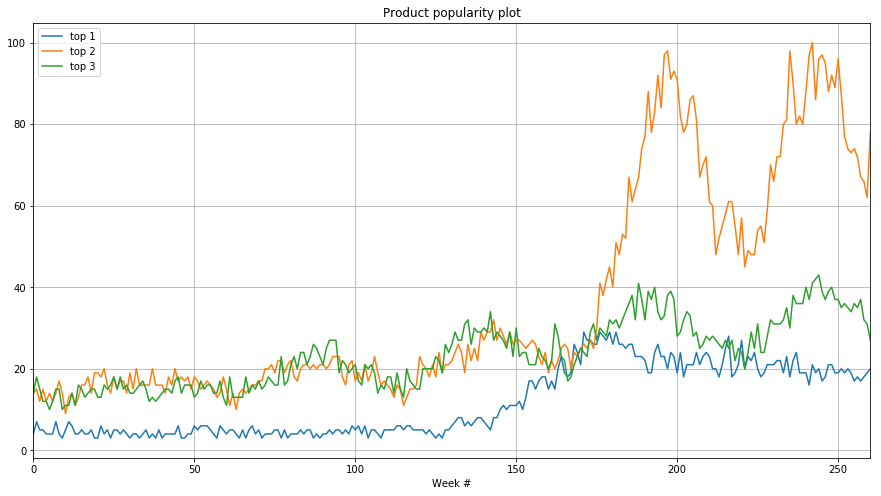

In [12]:
trends_df['top 1'].plot()
trends_df['top 2'].plot()
trends_df['top 3'].plot()
plt.legend()
plt.title("Product popularity plot")
plt.xlabel("Week #")
plt.grid()
plt.show()

## Trend, Seasonal Analysis

In [13]:
trends_df['date'] = pd.to_datetime(trends_df['date'])

In [14]:
def seasonal_plot(item_name):
    for year in range(2013,2017,1):
        current_year = list(trends_df[trends_df['date'].dt.year==year][item_name])
        plt.plot(current_year.index(max(current_year)), max(current_year), 'g^', ms=15)
        plt.plot(current_year.index(min(current_year)), min(current_year), 'rv', ms=15)
        plt.plot(current_year, label=year)
    plt.legend()
    plt.grid()
    plt.title("week on week analysis for {}, with highest and lowest point marker".format(item_name))
    plt.show()

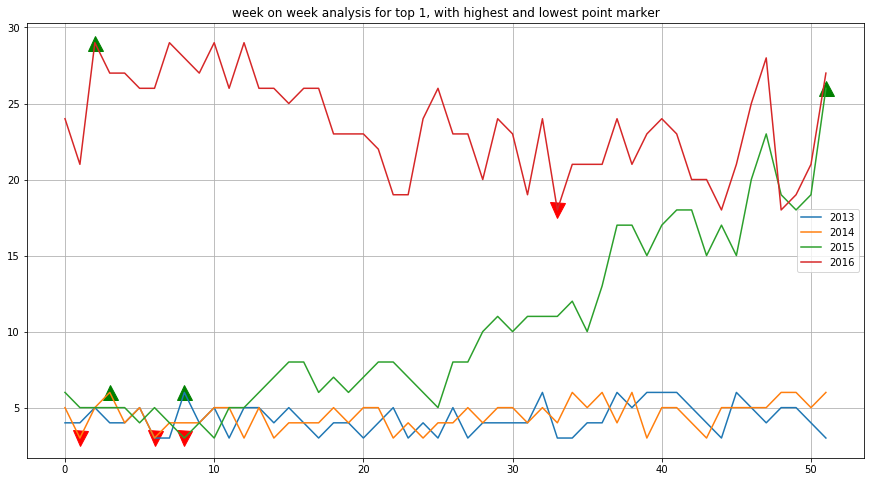

In [15]:
seasonal_plot('top 1')

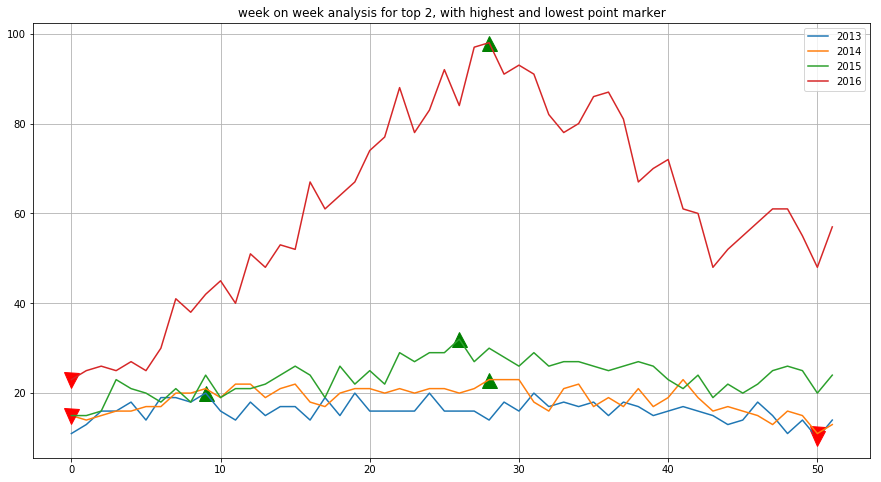

In [16]:
seasonal_plot('top 2')

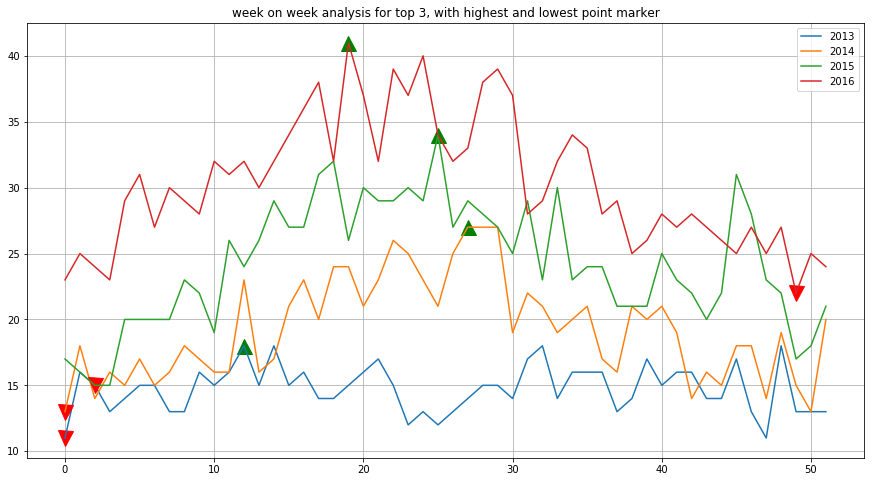

In [17]:
seasonal_plot('top 3')

#### Observation Seasonal popularity
* Sales of items are increasing over the years for all items.
* Observing the seasonal popularity trends:
    Without smoothing or scaling the trend might not be best visible.
    * Top 1
    The sales seems the be focused on the months dec and jan
    The product has gained a lot of popularity 2015, and maintains it to the present.
    * Top 2
    Top 2 shows a consistent popularty in mid-year whereas poor popularity in dec-feb.
    perhaps a summer dress!
    * Top 3
    Similar to Top 2, Top 3 also has a dip in popularity in the months leading from dec-jan.
    The product seems to have a longer sales cycle in mid year.
---    

#### Data Trend
* make data stationary on mean by taking difference (remove the upward trend by applying 1st order series differencing)

In [18]:
def first_order_diff(item_name):
    diff_item = trends_df[item_name].diff()
    plt.plot(diff_item, 'g-')
    plt.title("Trend (upward) removed from {}".format(item_name))
    plt.grid()
    plt.show()

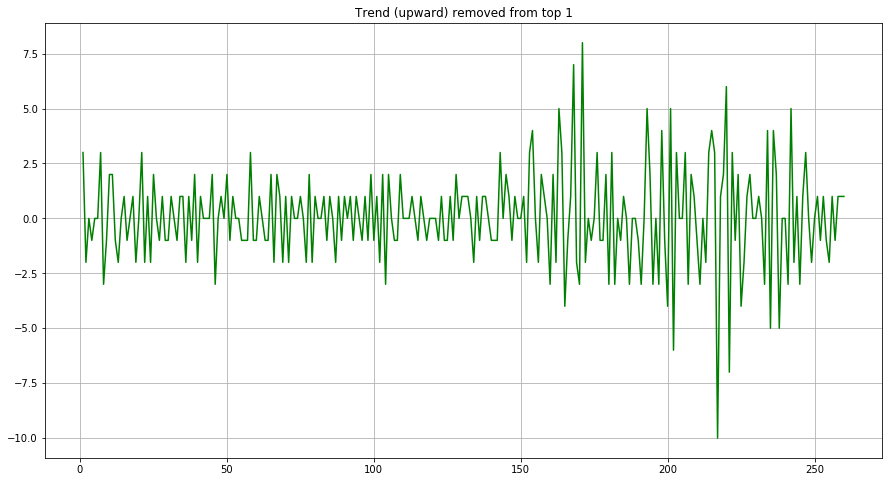

In [19]:
first_order_diff('top 1')

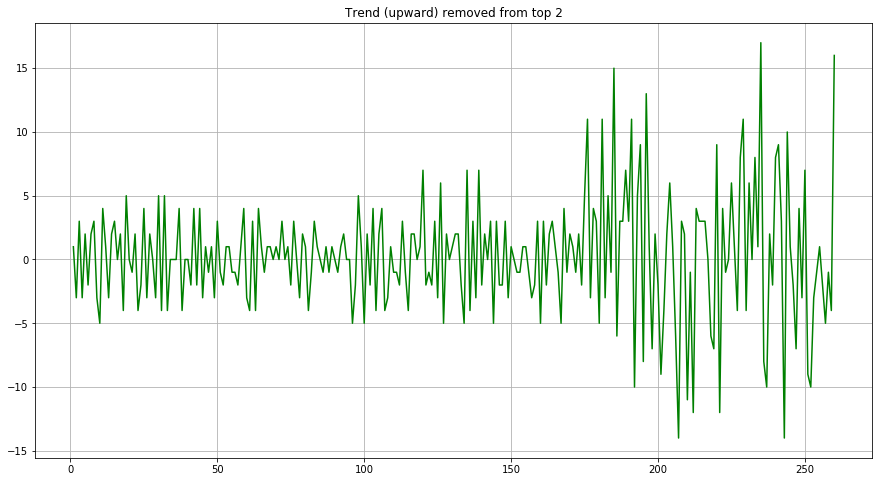

In [20]:
first_order_diff('top 2')

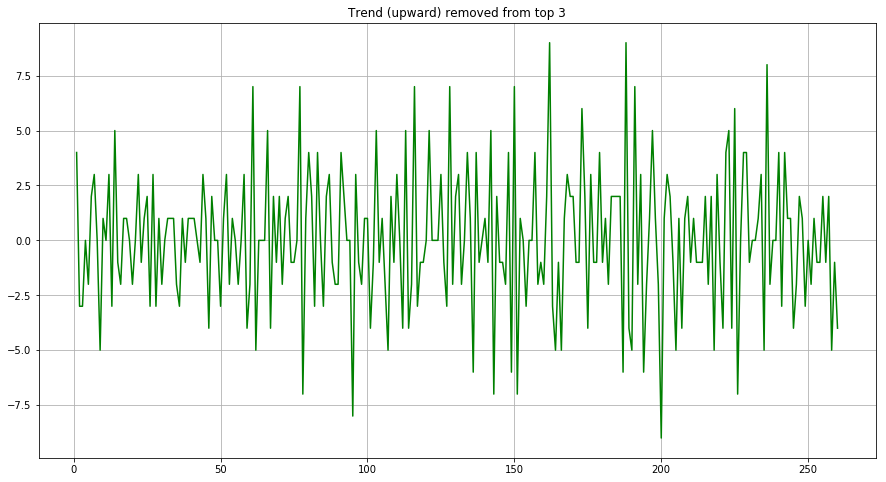

In [21]:
first_order_diff('top 3')

#### Observation (on trend removed data)
* Variance is not stationary throughout the product life (especially in top 1 and 2)
* Meaning the growth trend is not linear.
* Variance in the first two products (top 1 and 2), has a higher variance in the last 2 years.
* This shows a bigger shift in product popularity from one period to next.
* Whereas top 3 has a relatively predictable popularity throught the period.
---

---

## TASK 1
<em>Assess the three trends in trends1.csv, which is performing best. Elaborate on
how you defined "best performance".</em>

In [22]:
# Mean popularity by item
mean_popularity = lambda item: print("Mean popularity of {} is {}".format(item, trends_df[item].mean()))

In [23]:
mean_popularity('top 1')
mean_popularity('top 2')
mean_popularity('top 3')

Mean popularity of top 1 is 11.796934865900383
Mean popularity of top 2 is 36.23371647509578
Mean popularity of top 3 is 23.452107279693486


#### Solution Task 1 --> Top 2
* In terms of average popularity for the recorded period of time **Top 2** shows the best performance.
* This performance is mainly due to the popularity surge in the last 2 years.
* Prior to that period the popularity of the item was more or less similar to top 3.
* If aspects like stock-keeping is taken into account there are valid seasonal trends (from the analysis above) that can be used to adjust the inventory seasonally. Top 2 shows a consistent popularity trend in mid year, and not so much in winter.
* It is worth mentioning that from the difference analysis **Top 3 has a reliable sales record** through out the recorder period, albeit less in volume or popularity in the last two years.
---

---

## TASK 2
<em>Quantify the performance over the last year - to establish what proportion of
demand has changed.</em>

In [24]:
def moving_average(item, window, plot=True):
    weights = np.repeat(1.0, window)/window
    values = list(trends_df[item])
    sma = np.convolve(values, weights, 'valid')
    if plot:
        zero_mat = np.zeros(window-1)
        plt.title("Simple moving average of {}".format(item))
        plt.plot(np.hstack((zero_mat, sma)))
        plt.plot(trends_df[item])
        plt.grid()
        plt.show()
    return sma

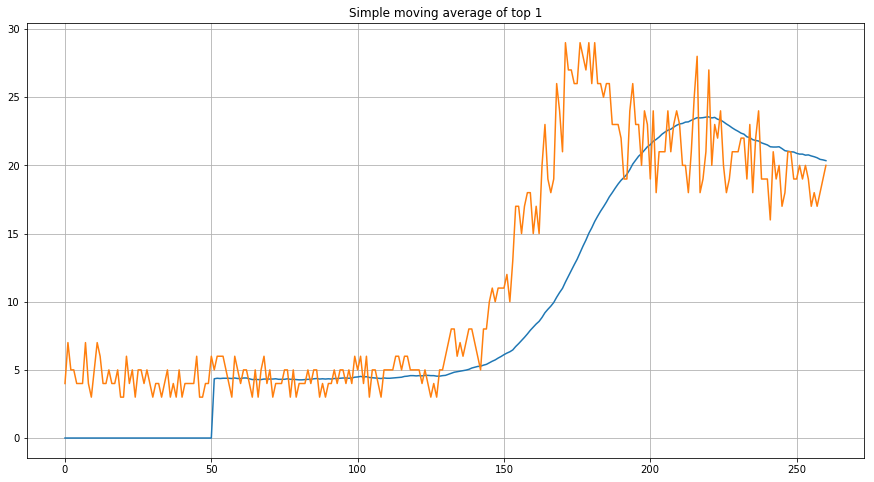

In [25]:
# perform simple moving average over a period of an year
sma_top_1 = moving_average('top 1', 52)

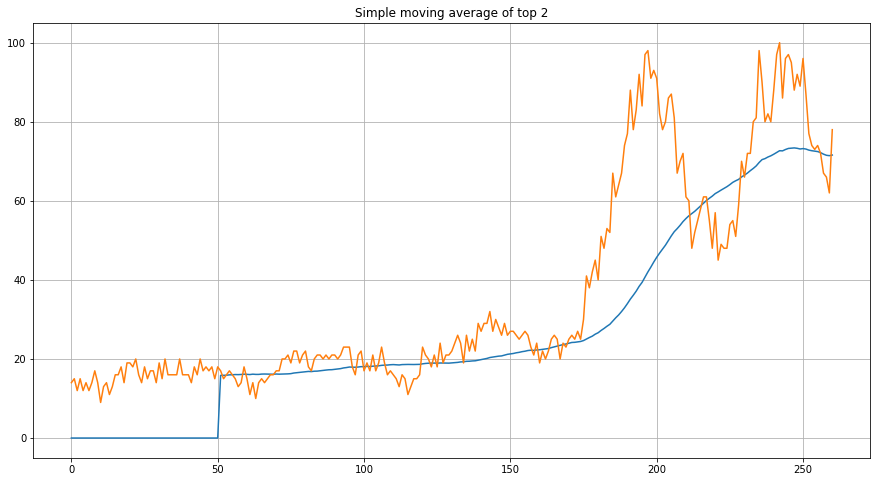

In [26]:
sma_top_2 = moving_average('top 2', 52)

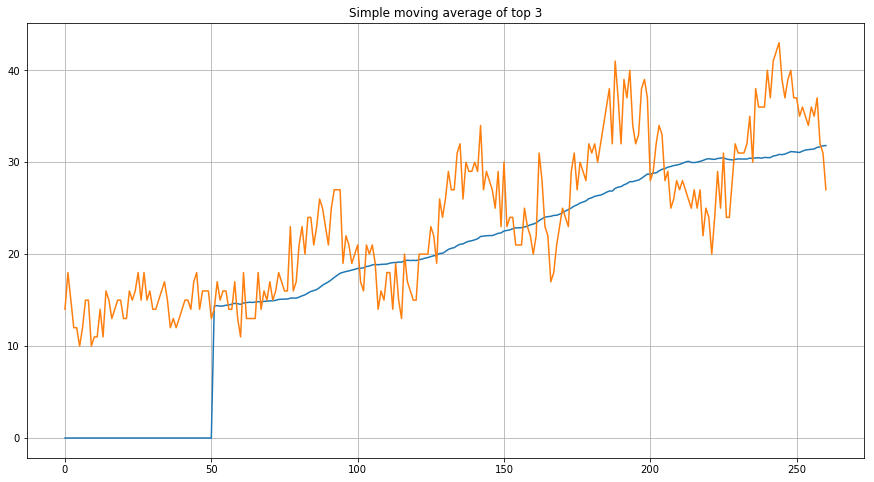

In [27]:
sma_top_3 = moving_average('top 3', 52)

In [28]:
# Growth of average popularirty by year
import datetime
print("Last known datapoint : ", trends_df.iloc[-1]['date'])

Last known datapoint :  2017-10-01 00:00:00


In [29]:
# Getting data for the last 365 days
print("Popularity mean for the last 365 days : ")
print("Period 2016/10 to 2017/10")
mean_nw = trends_df[trends_df['date']>'2016-10-01'].mean()
print(mean_nw)
print("Overall product demand average : ", np.mean(list(mean_nw[1:])))
t_year =  np.array(list(mean_nw[1:]) + [np.mean(list(mean_nw[1:]))])

Popularity mean for the last 365 days : 
Period 2016/10 to 2017/10
Unnamed: 0    234.000000
top 1          20.396226
top 2          71.547170
top 3          31.698113
dtype: float64
Overall product demand average :  41.213836478


In [30]:
print("Popularity mean for the second to last 365 days : ")
print("Period 2015/10 to 2016/10")
mean_nw = trends_df[(trends_df['date']>'2015-10-01') & (trends_df['date']<'2016-10-01')].mean()
print(mean_nw)
print("Overall product demand average : ", np.mean(list(mean_nw[1:])))
t_minus_1_year =  np.array(list(mean_nw[1:]) + [np.mean(list(mean_nw[1:]))])

Popularity mean for the second to last 365 days : 
Period 2015/10 to 2016/10
Unnamed: 0    181.500000
top 1          22.653846
top 2          52.961538
top 3          29.538462
dtype: float64
Overall product demand average :  35.0512820513


In [31]:
print("Popularity mean for the third to last 365 days : ")
print("Period 2014/10 to 2015/10")
mean_nw = trends_df[(trends_df['date']>'2014-10-01') & (trends_df['date']<'2015-10-01')].mean()
print(mean_nw)
print("Overall product demand average : ", np.mean(list(mean_nw[1:])))
t_minus_2_year =  np.array(list(mean_nw[1:]) + [np.mean(list(mean_nw[1:]))])

Popularity mean for the third to last 365 days : 
Period 2014/10 to 2015/10
Unnamed: 0    129.500000
top 1           6.923077
top 2          21.961538
top 3          22.865385
dtype: float64
Overall product demand average :  17.25


In [32]:
pcg_per_year = lambda a, b: np.round(((a-b)/b)*100, 2)

In [33]:
print("Growth from 2016 to 2017", pcg_per_year(t_year, t_minus_1_year))
print("Growth from 2015 to 2016", pcg_per_year(t_minus_1_year, t_minus_2_year))

Growth from 2016 to 2017 [ -9.97  35.09   7.31  17.58]
Growth from 2015 to 2016 [ 227.22  141.16   29.18  103.2 ]


#### Solution Task 2
* From the moving average analysis the trend is clear that the popularity has increased for all the 3 products throughout the 5 year period. And most of the growth can be attributed to the last 2 years.
* Quantified growth

|      | 2015 | 2016 |
|------|------|------|
|top 1 |  227.22% |  -9.97% |
|top 2 |  141.16% |  35.09% |
|top 3 |  29.18% |  7.31% |
|overall |  103.2% |  17.58% |

---

---

## TASK 3
<em>Look at the predictions.csv file - there are three fits for each trend, comment
on which you find to be best..</em>

In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [35]:
def pred_fit_plot(item, plot=True):
    it = ['fit '+ item, 'fit2 '+ item, 'fit3 '+ item]
    pred_fit_1 = list(pred_df[it[0]][:261])
    pred_fit_2 = list(pred_df[it[1]][:261])
    pred_fit_3 = list(pred_df[it[2]][:261])
    if plot:
        plt.plot(pred_fit_1, 'r-', label="fit 1")
        plt.plot(pred_fit_2, 'g-', label="fit 2")
        plt.plot(pred_fit_3, 'b-', label="fit 3")
        plt.plot(trends_df[item], 'y--', label="gt")
        plt.grid()
        plt.title("Comparison of ground truth and generated from fit for {}".format(item))
        plt.legend(loc='upper left')
        plt.show()
    rms_fit_1 = sqrt(mean_squared_error(trends_df[item], pred_fit_1))
    rms_fit_2 = sqrt(mean_squared_error(trends_df[item], pred_fit_2))
    rms_fit_3 = sqrt(mean_squared_error(trends_df[item], pred_fit_3))
    print("Room mean square error comparison  fit_1 = ", rms_fit_1)
    print("Room mean square error comparison  fit_2 = ", rms_fit_2)
    print("Room mean square error comparison  fit_3 = ", rms_fit_3)
    return np.array([rms_fit_1, rms_fit_2, rms_fit_3])

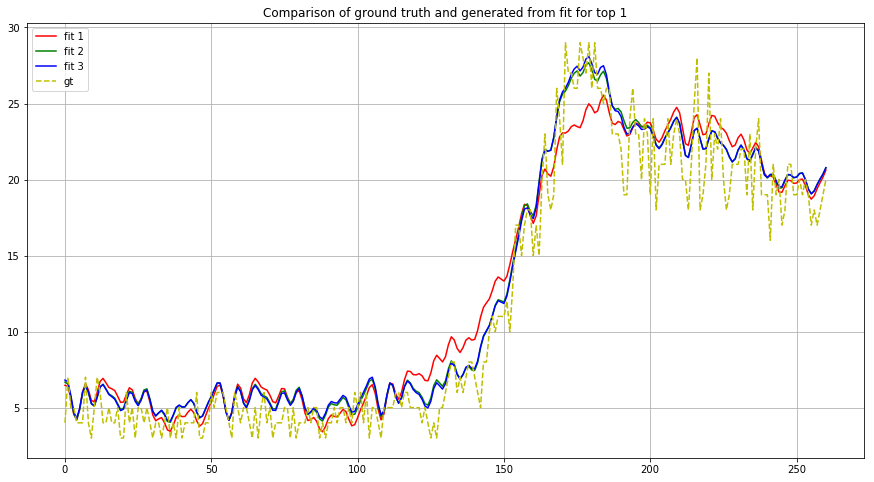

Room mean square error comparison  fit_1 =  2.1492895396899963
Room mean square error comparison  fit_2 =  1.7787811132422382
Room mean square error comparison  fit_3 =  1.7579881182751556


In [36]:
rms_top_1 = pred_fit_plot('top 1')

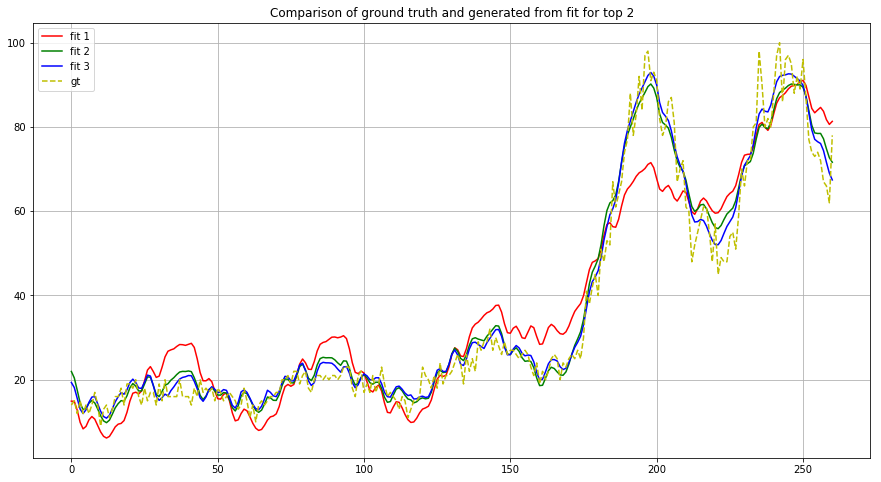

Room mean square error comparison  fit_1 =  8.334584010749102
Room mean square error comparison  fit_2 =  4.403149324014167
Room mean square error comparison  fit_3 =  3.6099141287879575


In [37]:
rms_top_2 = pred_fit_plot('top 2')

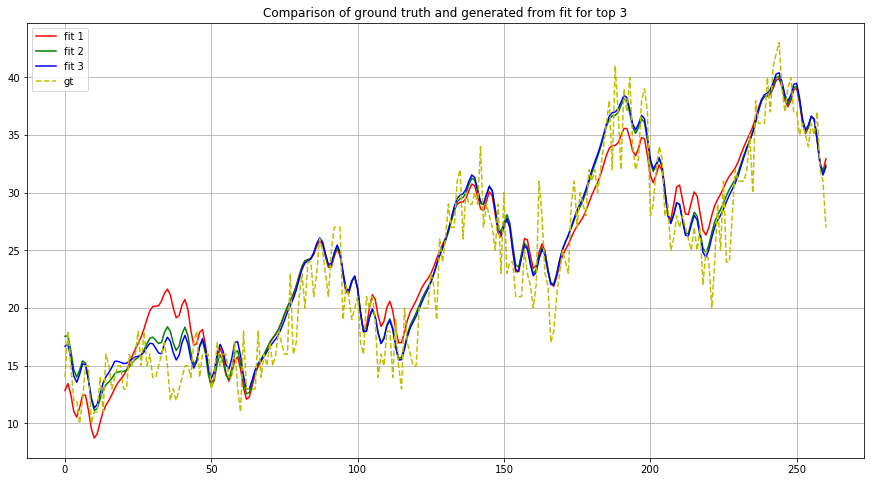

Room mean square error comparison  fit_1 =  2.9793270764497084
Room mean square error comparison  fit_2 =  2.4637826019206166
Room mean square error comparison  fit_3 =  2.3682932923910878


In [38]:
rms_top_3 = pred_fit_plot('top 3')

In [39]:
print("Overall RMSE for all products; fit1, fit2, fit3 respetively:")
print((rms_top_1 + rms_top_2 + rms_top_3)/3)

Overall RMSE for all products; fit1, fit2, fit3 respetively:
[ 4.48773354  2.88190435  2.57873185]


#### Solution Task 3
* From analyzing the root mean square error on all fits, **fit 3 shows the best prediction**.

---

---

## TASK 4
<em>Quantify these predictions into an assessment of how you would expect the
demand to change over the next 3, 6, 12 months.</em>

Prediction is from 2017-10-01 to 2018-10-01. (period 1 year)
</br>
Analyzing fit3 (due to performance on test set)

In [40]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [41]:
pred_df['date'] = pd.to_datetime(pred_df['date'])
pred_df.head(3)

Unnamed: 0       date  fit top 1  fit top 2  fit top 3  fit2 top 3  \
0           0 2012-10-07   6.464020  14.918372  12.852700   17.560586   
1           1 2012-10-14   6.405044  14.879459  13.460605   17.584433   
2           2 2012-10-21   5.594880  12.766397  12.500809   16.287381   

   fit3 top 3  fit2 top 2  fit3 top 2  fit2 top 1  fit3 top 1  
0   16.691433   21.967562   19.348604    6.676299    6.814028  
1   16.864402   20.428943   18.149665    6.553469    6.678460  
2   15.672930   17.533925   15.621429    5.685904    5.801919

In [42]:
# Extract future prediction
future_df = pred_df[(pred_df['date'] > '2017-10-01')]
future_df.tail(3)

Unnamed: 0       date  fit top 1  fit top 2  fit top 3  fit2 top 3  \
623         623 2018-09-29  16.724295  99.019655  36.689969   36.538825   
624         624 2018-09-30  16.794364  99.184409  36.900044   36.682254   
625         625 2018-10-01  16.864604  99.372937  37.128318   36.841104   

     fit3 top 3  fit2 top 2  fit3 top 2  fit2 top 1  fit3 top 1  
623   36.265359   72.967858   64.104769   17.629760   17.656862  
624   36.412168   72.847916   63.903832   17.693017   17.720324  
625   36.574825   72.740112   63.712625   17.756372   17.783823

In [43]:
def plot_with_period_marker(item):
    plt.subplot(212)
    plt.title("Trend recorded for {} till 2017-10".format(item))
    plt.grid()
    plt.plot(trends_df[item])
    plt.subplot(211)
    plt.title("Trend prediction for {} (2017-10 to 2018-10)".format(item))
    item = "fit3 " + item
    data = list(future_df[item])
    plt.plot(data)
    plt.grid()
    plt.axvspan(0, 91, alpha=0.2, color='red')
    plt.axvspan(91, 183, alpha=0.2, color='yellow')
    plt.axvspan(183, len(data), alpha=0.2, color='green')
    plt.show()

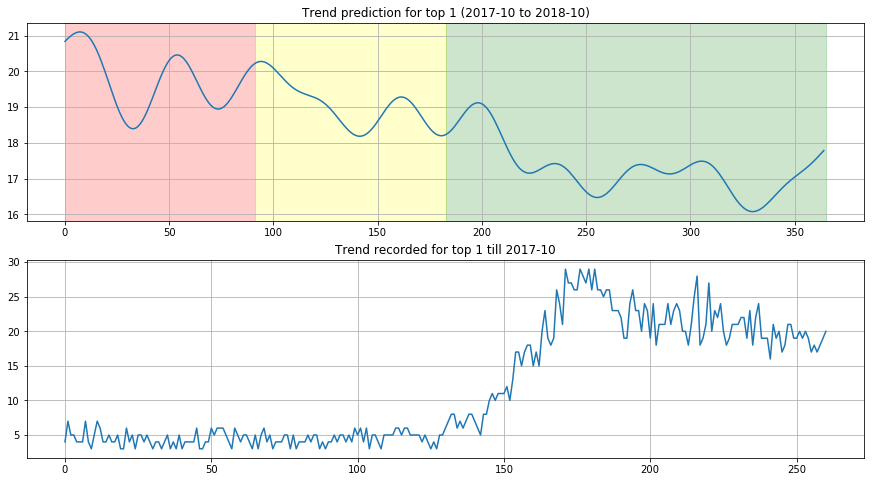

In [44]:
plot_with_period_marker('top 1')

In [45]:
print("top 1")
print("Mean sales for next year : ", future_df['fit3 top 1'].mean())
print("Mean sales for last year : ", trends_df[(trends_df['date'] > '2016-10-01') & (trends_df['date'] < '2017-10-01')]['top 1'].mean())

top 1
Mean sales for next year :  18.34922612665839
Mean sales for last year :  20.403846153846153


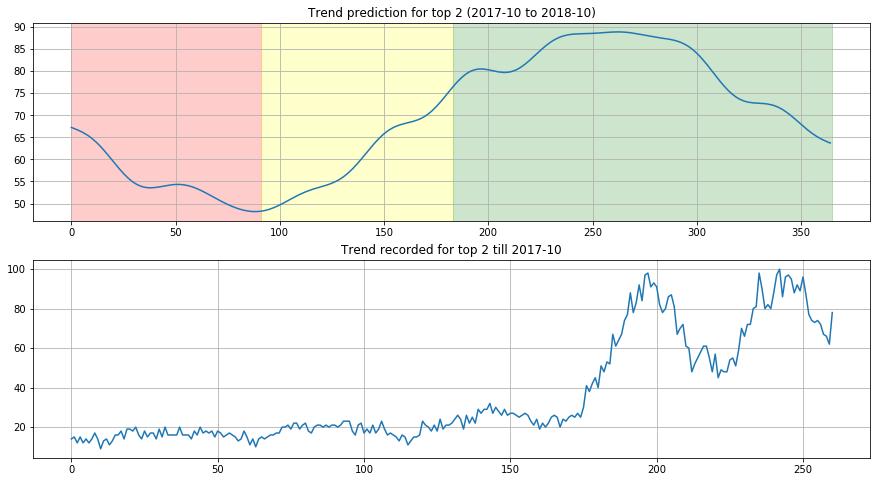

In [46]:
plot_with_period_marker('top 2')

In [47]:
print("top 2")
print("Mean sales for next year : ", future_df['fit3 top 2'].mean())
print("Mean sales for last year : ", trends_df[(trends_df['date'] > '2016-10-01') & (trends_df['date'] < '2017-10-01')]['top 2'].mean())

top 2
Mean sales for next year :  69.13467481689669
Mean sales for last year :  71.42307692307692


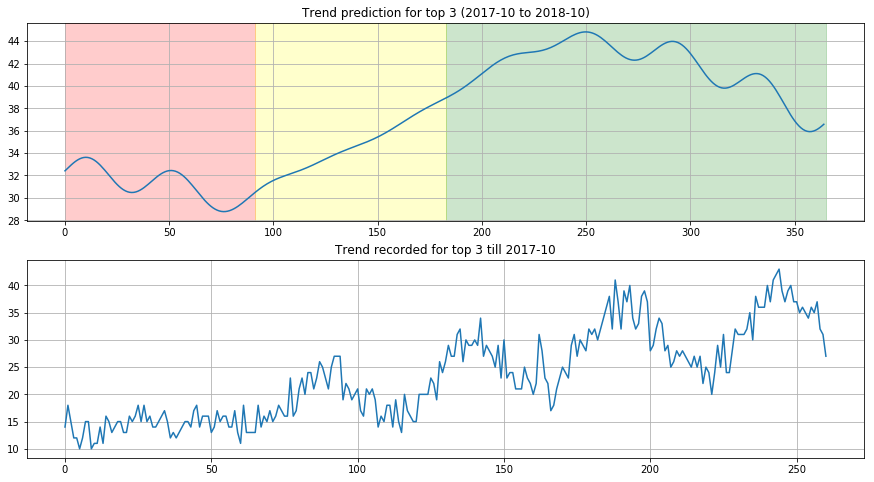

In [48]:
plot_with_period_marker('top 3')

In [49]:
print("top 3")
print("Mean sales for next year : ", future_df['fit3 top 3'].mean())
print("Mean sales for last year : ", trends_df[(trends_df['date'] > '2016-10-01') & (trends_df['date'] < '2017-10-01')]['top 3'].mean())

top 3
Mean sales for next year :  37.218144740944474
Mean sales for last year :  31.78846153846154


#### Solution Task 4    
**Top 1**
* The trend prediction for Top 1 seems to show a slight downward run.
* The average sales can expect to face a decreas of 10%.   

**Top 2**
* Top 2 has been undergoing huge changes in the last 2 years. This trend is expected to continue for the next year.
* The coming quarter the sales will continue on a downward trend, but followed up in another 6 months the item popularity can again be expected to reach close its past peaks.
* On average the popularity is not expected to change much (3% decrease).    

**Top 3**
* Top is showing much promise for the next year.
* The quarter is expected to start out with consistent sales.
* Followed by another 3-4 months of steady increase.
* Overall the popularity of top 3 can be expected to rise another 17%.
---

---

## TASK 5
<em>Please create your own predictions based of the three types of tops.</em>

In [75]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

In [76]:
EPOCHS = 50

In [77]:
def grab_data(item_name):
    data = trends_df[item_name]
    data = data.astype('float32')
    data = data.values.reshape(data.shape[0], 1)
    return data

In [78]:
# train and test split (7:3)
def train_test_split(data):
    train_size = int(len(data) * .70)
    test_size = len(data) - train_size
    train, test = data[0:train_size, :], data[train_size: len(data), :]
    assert (len(train) + len(test))==len(data), "Size mismatch"
    return train, test

In [79]:
# create sequence dataset and label. for current val, label will be next val
def dataset_gen(data):
    X, y = [], []
    for i in range(len(data)-2):
        a = data[i:i+1, 0]
        X.append(a)
        y.append(data[i+1, 0])
    return np.array(X), np.array(y)

In [80]:
def train_and_test(item):
    # prepare and split data
    data = grab_data(item)
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    train, test = train_test_split(data)
    train_X, train_y = dataset_gen(train)
    test_X, test_y = dataset_gen(test)
    train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
    test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
    # train
    print("Training ....")
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=EPOCHS, batch_size=1, verbose=0)
    # make predictions
    trainPredict = model.predict(train_X)
    testPredict = model.predict(test_X)
    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    train_y = scaler.inverse_transform([train_y])
    testPredict = scaler.inverse_transform(testPredict)
    test_y = scaler.inverse_transform([test_y])
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(train_y[0], trainPredict[:,0]))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(test_y[0], testPredict[:,0]))
    print('Test Score: %.2f RMSE' % (testScore))
    # shift train predictions for plotting
    trainPredictPlot = np.empty_like(data)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[1:len(trainPredict)+1, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = np.empty_like(data)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(trainPredict)+3:len(data)-1, :] = testPredict
    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(data), 'r--', label="original")
    plt.plot(trainPredictPlot, 'b-', label="test set")
    plt.plot(testPredictPlot, 'g-', label="train set")
    plt.legend()
    plt.title("Prediction on item {}".format(item))
    plt.grid()
    plt.show()

Training ....
Train Score: 1.67 RMSE
Test Score: 2.79 RMSE


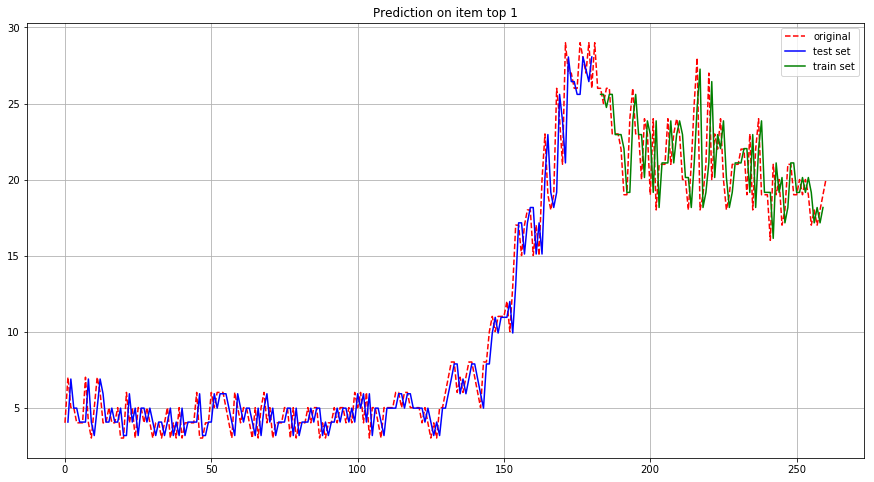

In [81]:
train_and_test('top 1')

Training ....
Train Score: 2.83 RMSE
Test Score: 6.96 RMSE


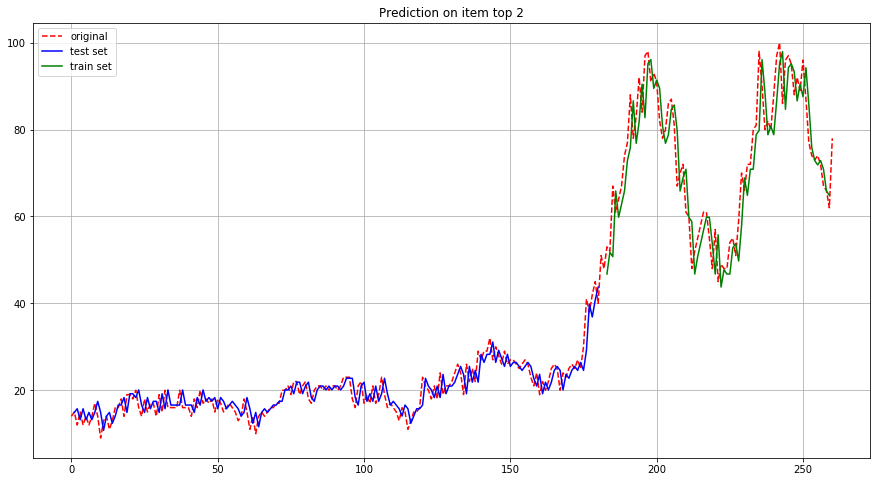

In [82]:
train_and_test('top 2')

Training ....
Train Score: 2.96 RMSE
Test Score: 3.95 RMSE


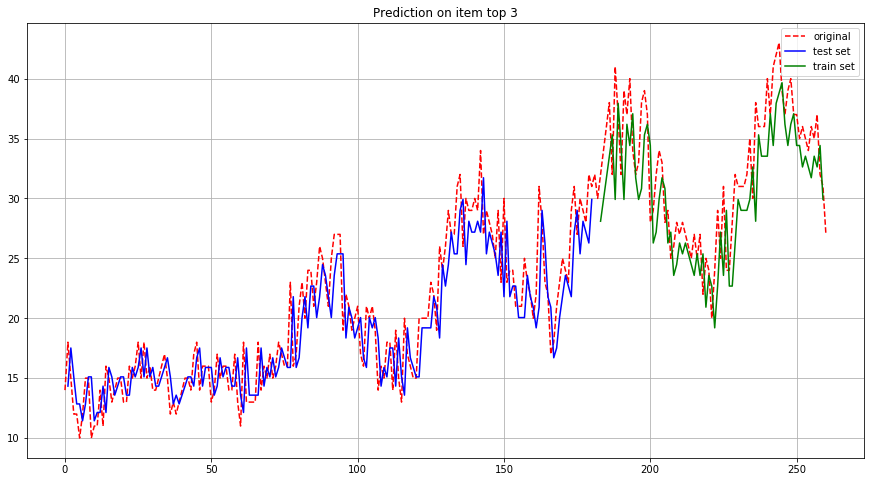

In [83]:
train_and_test('top 3')

#### Solution Task 5
* A Recurrent neural network with LSTM is implemented.
* The data record has been split into train and test sets.
* Fitted to network.
* An inference is ran, RMSE generated and results plotted.

---

---

## TASK 6
<em>Briefly explain your choice of model, and how it performs better or worse than
the provided predictions.</em>

In [96]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


#### Solution Task 6
* For this time series analysis I used an LSTM network.
* The particular implementation is shallow, not very deep, with about 100 trainable parameteres.
* The average RMSE on train set is less than 5. Which is similar performance of fit1 from the prediction.csv.
* Before trying deeper RNNs or other similar deep networks, i would try to use some more conventional analysis to have a better understanding of the data and business. ARIMA like models could reveal underlying trends with more clarity.

---

---

#### Resources used/found helpful
https://machinelearningmastery.com/difference-time-series-dataset-python/

http://ucanalytics.com/blogs/time-series-decomposition-manufacturing-case-study-example-part-2/

http://conx.readthedocs.io/en/latest/LSTM.html

https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

### Thank you :)